# DATATHONS 2022 
TIME 1

- Éverton Luís Mendes da Silva
- Alex
- Gustavo
- Isaac

## Este trabalho é dedicado ao estudo da relçao carga x temperatura para São Paulo

### Extraindo os dados do Portal de dados do ONS

In [ ]:
import pandas as pd
import zipfile
import numpy as np
import requests 
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fileBytes = BytesIO(requests.get('https://ons-dl-prod-opendata.s3.amazonaws.com/datathons/Datathons_pec_carga.zip').content)
zip = zipfile.ZipFile(fileBytes)
zip.extractall()

In [ ]:
df_carga = pd.read_csv('Datathons_pec_carga/seriesCargaSP.csv', sep = ';', encoding = 'utf-8')
df_carga = df_carga.sort_values('din_ocorrencia')
df_carga['nom_seriehistorica'] = df_carga['nom_seriehistorica'].str.replace('SP-', '')
df_carga['din_ocorrencia'] =  pd.to_datetime(df_carga['din_ocorrencia'])
df_carga['val_itemserieoriginal'] =  pd.to_numeric(df_carga['val_itemserieoriginal'].str.replace(',', '.'), errors = 'coerce')
df_carga = df_carga.drop_duplicates()
df_carga.tail().reset_index()


,index,nom_seriehistorica,din_ocorrencia,val_itemserieoriginal
0,164843,CPFL PAULISTA,2022-03-31 22:00:00,4288.117188
1,238583,ELETROPAULO,2022-03-31 23:00:00,4829.259766
2,212718,CPFL SANTA CRUZ,2022-03-31 23:00:00,360.433990
3,222061,CPFL PIRATININGA,2022-03-31 23:00:00,1821.708008
4,164844,CPFL PAULISTA,2022-03-31 23:00:00,3982.825928


###Construindo Dados Temporais de carga



In [ ]:
df_cargaT = df_carga.pivot(index='din_ocorrencia', columns=['nom_seriehistorica'], values=['val_itemserieoriginal']).copy(deep=True)
df_cargaT.columns = [value[1] for value in df_cargaT.columns]
df_cargaT.tail()

,CPFL PAULISTA,CPFL PIRATININGA,CPFL SANTA CRUZ,EDP SP,ELEKTRO,ELETROPAULO,ENERGISA SSE-SP
din_ocorrencia,,,,,,,
2022-03-31 19:00:00,5001.751953,2116.093994,470.817993,NaN,NaN,6818.549805,NaN
2022-03-31 20:00:00,4770.509766,2049.737061,444.898010,NaN,NaN,6587.189941,NaN
2022-03-31 21:00:00,4597.223145,2035.076050,423.415008,NaN,NaN,6144.629883,NaN
2022-03-31 22:00:00,4288.117188,1931.459961,391.589996,NaN,NaN,5476.700195,NaN
2022-03-31 23:00:00,3982.825928,1821.708008,360.433990,NaN,NaN,4829.259766,NaN


### Consumo de energia por Concessionária

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def LinePlotByID(df, column):
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines'))
    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(
        title=column
    )
    fig.show()

In [ ]:
LinePlotByID(df_cargaT, 'CPFL PAULISTA')

In [ ]:
df_carga = df_carga.rename(columns={'nom_seriehistorica': 'Distribuidora'})


In [ ]:
'''
cdd = cdd.rename(columns={'nome': 'Município'})
inmet = inmet.rename(columns={'nom_longo': 'Município'})
dataset__ = pd.merge(df_carga, dist, how = 'inner', on = 'Distribuidora')
dataset_ = pd.merge(dataset__, cdd, how = 'inner', on = 'Município')
dataset = pd.merge(dataset_, inmet, how = 'inner', on = 'Município')
'''

"\ncdd = cdd.rename(columns={'nome': 'Município'})\ninmet = inmet.rename(columns={'nom_longo': 'Município'})\ndataset__ = pd.merge(df_carga, dist, how = 'inner', on = 'Distribuidora')\ndataset_ = pd.merge(dataset__, cdd, how = 'inner', on = 'Município')\ndataset = pd.merge(dataset_, inmet, how = 'inner', on = 'Município')\n"

In [ ]:
cdd =  pd.read_csv('Datathons_pec_carga/Municipios_SP.csv', sep = ',', encoding = 'utf-8')
cdd = cdd.drop_duplicates()
cdd.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


### Dataset INMET

In [ ]:
inmet =  pd.read_csv('Datathons_pec_carga/inmet.csv', sep = ';', encoding = 'utf-8')
inmet['din_medicao'] = pd.to_datetime(inmet['din_medicao'])
inmet = inmet.sort_values('din_medicao')
inmet = inmet.drop_duplicates()
inmet.tail()

,id_estacaometeo,id_varmeteo,nom_varmeteo,nom_longo,din_medicao,din_inclusaodl,val_medicao,val_altitude,val_latitude,val_longitude
2020815,A728,TEM_MIN,TEMPERATURA MÍNIMA NA HORA ANT.,Taubaté,2022-06-13 11:00:00,2022-06-13 14:03:51.000,NaN,571.0,-23.041666,-45.520832
2020817,A733,TEM_MIN,TEMPERATURA MÍNIMA NA HORA ANT.,Jales,2022-06-13 11:00:00,2022-06-13 14:03:51.000,NaN,457.0,-20.165000,-50.595000
2020818,A734,TEM_MIN,TEMPERATURA MÍNIMA NA HORA ANT.,Valparaiso,2022-06-13 11:00:00,2022-06-13 14:03:51.000,NaN,374.0,-21.319166,-50.930280
2020820,A736,TEM_MIN,TEMPERATURA MÍNIMA NA HORA ANT.,Ariranha,2022-06-13 11:00:00,2022-06-13 14:03:51.000,15.3,525.0,-21.133055,-48.840557
2020667,A768,TEM_MAX,TEMPERATURA MÁXIMA NA HORA ANT.,Tupã,2022-06-13 11:00:00,2022-06-13 14:03:51.000,18.3,498.0,-21.927252,-50.490250


In [ ]:
print(f"Há {len(inmet['nom_longo'].unique())} estações de medição de temperatura monitorados pelo ONS") 

Há 43 estações de medição de temperatura monitorados pelo ONS


In [ ]:
inmet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4936390 entries, 259285 to 2020667
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id_estacaometeo  object        
 1   id_varmeteo      object        
 2   nom_varmeteo     object        
 3   nom_longo        object        
 4   din_medicao      datetime64[ns]
 5   din_inclusaodl   object        
 6   val_medicao      float64       
 7   val_altitude     float64       
 8   val_latitude     float64       
 9   val_longitude    float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 414.3+ MB


###Construindo Dados Temporais de Temperatura


In [ ]:
inmetT_df = inmet.copy(deep=True).drop_duplicates(['id_varmeteo', 'id_estacaometeo', 'din_medicao'], keep='last')

min_df = inmetT_df[inmetT_df['id_varmeteo']=='TEM_MIN'].pivot(index='din_medicao', columns=['id_estacaometeo'], values=['val_medicao'])
min_df.columns = [value[1]+"_min" for value in min_df.columns]

max_df = inmetT_df[inmetT_df['id_varmeteo']=='TEM_MAX'].pivot(index='din_medicao', columns=['id_estacaometeo'], values=['val_medicao'])
max_df.columns = [value[1]+"_max" for value in max_df.columns]

temp_df = pd.concat([min_df, max_df], axis=1)

temp_df.tail()

### Localização Geográfica das Estações

In [ ]:
postos_location = inmet.groupby(['id_estacaometeo']).first()[['val_altitude', 'val_latitude', 'val_longitude', 'nom_longo']]
postos_location.tail()

,val_altitude,val_latitude,val_longitude,nom_longo
id_estacaometeo,,,,
A767,24.0,-23.810833,-45.402500,São Sebastião
A768,498.0,-21.927221,-50.490276,Tupã
A769,586.0,-22.688889,-45.005554,Cachoeira Paulista
A770,620.0,-21.461111,-47.579445,São Simão (SP)
A771,771.0,-23.724722,-46.678055,São Paulo-SESC Interlagos


### Dataset Distribuidoras

In [ ]:
distribuidoras =  pd.read_excel('Datathons_pec_carga/Distribuidoras_Area_Atuacao.xlsx')
dist = distribuidoras.drop_duplicates()
dist.head()

,Distribuidora,Município,Estado
0,CPFL SANTA CRUZ,Águas de Santa Bárbara,SP
1,CPFL SANTA CRUZ,Arandu,SP
2,CPFL SANTA CRUZ,Avaré,SP
3,CPFL SANTA CRUZ,Barra do Jacaré,PR
4,CPFL SANTA CRUZ,Bernardino de Campos,SP


In [ ]:
dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Distribuidora  664 non-null    object
 1   Município      664 non-null    object
 2   Estado         664 non-null    object
dtypes: object(3)
memory usage: 20.8+ KB


### Ponderando a importância dos postos por Localização perto das distribuidoras

In [ ]:
cidades_dist=[dist.replace('Ipauçu', "Ipaussu")[dist["Distribuidora"]==distribuidora]['Município'].values for distribuidora in dist["Distribuidora"].unique()]

pondera_dict ={distribuidora:{posto:0 for posto in postos_location.index} for distribuidora in dist["Distribuidora"].unique()}
for index, distribuidora in enumerate(dist["Distribuidora"].unique()):
    for posto in postos_location.index:
        for cidade in cidades_dist[index]:
            #print(distribuidora, cidade, posto)
            #print(cdd[cdd['nome']==cidade]['latitude'])
            #print(cdd[cdd['nome']==cidade]['longitude'])
            if cidade == "Embu":
                cidade="Embu das Artes"
            elif cidade == "Ipauçu":
                cidade = "Ipaussu"
            elif cidade == "São Luís do Paraitinga":
                cidade = "São Luiz do Paraitinga"
            cidade = cidade.replace("´", "'")

            pondera_dict[distribuidora][posto]+=np.sqrt(
                (postos_location.loc[posto]['val_latitude'] - cdd[cdd['nome']==cidade]['latitude'].values[0])**2 + (postos_location.loc[posto]['val_longitude'] - cdd[cdd['nome']==cidade]['longitude'].values[0])**2
                )
            
for distribuidora in dist["Distribuidora"].unique():
    soma_postos=sum(pondera_dict[distribuidora].values())
    for posto in postos_location.index: 
        pondera_dict[distribuidora][posto] = (pondera_dict[distribuidora][posto])/(soma_postos)

pondera_df = pd.DataFrame().from_dict(pondera_dict)
pond_df = (1/pondera_df).div((1/pondera_df).sum(axis=0))

In [ ]:
fig = px.bar(pond_df.transpose(), x=pond_df.transpose().columns, title='Postos')
fig.show()

In [ ]:
fig = px.bar(pond_df, y=pond_df.columns[6])
fig.show()

## Carga x Estações 
 
- Probabilidade de Possíveis Cenários

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def TempCargaPlot(df, column1, column2):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    # Add traces
    fig.add_trace(
        go.Scatter(x=df.index, y=df[column1].values, name=column1),
        secondary_y=False,
    )
    fig.add_trace(
        go.Scatter(x=df.index, y=df[column2].values, name=column2),
        secondary_y=True,
    )
    # Add figure title
    fig.update_layout(
        title_text="Carga x Temperatura"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="xaxis title", rangeslider_visible=True)
    fig.show()

In [ ]:
merge_df = pd.concat([df_cargaT, temp_df], axis=1)
merge_df.tail()

,CPFL PAULISTA,CPFL PIRATININGA,CPFL SANTA CRUZ,EDP SP,ELEKTRO,ELETROPAULO,ENERGISA SSE-SP,A701_min,A705_min,A706_min,...,A762_max,A763_max,A764_max,A765_max,A766_max,A767_max,A768_max,A769_max,A770_max,A771_max
2022-06-13 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,6.9,3.5,...,NaN,10.1,NaN,NaN,6.0,NaN,9.2,6.7,9.5,7.4
2022-06-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,6.9,4.4,...,NaN,10.9,NaN,NaN,7.8,NaN,10.3,9.3,9.9,8.9
2022-06-13 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,8.5,7.0,...,NaN,12.3,NaN,NaN,10.7,NaN,14.3,11.3,13.2,12.2
2022-06-13 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,12.4,9.5,...,NaN,14.1,NaN,NaN,13.5,NaN,16.9,14.1,16.0,13.3
2022-06-13 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.6,13.2,11.7,...,NaN,16.1,NaN,NaN,16.7,NaN,18.3,15.9,18.5,14.3


In [ ]:
TempCargaPlot(merge_df, merge_df.columns[0], merge_df.columns[-1])

In [ ]:
import plotly.graph_objects as go

import numpy as np

def TempCargaDistribution(df, column1, column2):

    fig = go.Figure()
    fig.add_trace(go.Histogram2dContour(
            x = merge_df[column1],
            y = merge_df[column2],
            colorscale = 'Blues',
            reversescale = True,
            xaxis = 'x',
            yaxis = 'y',
            histnorm = 'probability' 

        ))
    fig.add_trace(go.Scatter(
            x = merge_df[column1],
            y = merge_df[column2],
            opacity=0.8,
            xaxis = 'x',
            yaxis = 'y',
            mode = 'markers',
            marker = dict(
                color = 'rgba(0,0,0,0.3)',
                size = 3
            )
        ))
    fig.add_trace(go.Histogram(
            y = merge_df[column2],
            xaxis = 'x2',
            marker = dict(
                color = 'rgba(0,0,0,1)'
            )
        ))
    fig.add_trace(go.Histogram(
            x = merge_df[column1],
            yaxis = 'y2',
            marker = dict(
                color = 'rgba(0,0,0,1)'
            )
        ))
    
    fig.update_xaxes(title="Carga")
    fig.update_yaxes(title="Temperatura")
    
    fig.update_layout(
        title="Histograma {} x {}".format(column1, column2),
        autosize = False,
        xaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        yaxis = dict(
            zeroline = False,
            domain = [0,0.85],
            showgrid = False
        ),
        xaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        yaxis2 = dict(
            zeroline = False,
            domain = [0.85,1],
            showgrid = False
        ),
        height = 600,
        width = 600,
        bargap = 0,
        hovermode = 'closest',
        showlegend = False
    )
    
    fig.show()

In [ ]:
TempCargaDistribution(merge_df.iloc[-200:], merge_df.columns[5], "A755_min")

##Teste de Causalidade de Granger


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

In [ ]:
gc_res = grangercausalitytests(merge_df[["ELETROPAULO", 'A755_min']].diff().dropna().values, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0760  , p=0.7828  , df_denom=35429, df_num=1
ssr based chi2 test:   chi2=0.0760  , p=0.7828  , df=1
likelihood ratio test: chi2=0.0760  , p=0.7828  , df=1
parameter F test:         F=0.0760  , p=0.7828  , df_denom=35429, df_num=1


In [ ]:
gc_res = grangercausalitytests(merge_df[["ELETROPAULO", 'A762_min']].diff().dropna().values, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=331.5225, p=0.0000  , df_denom=31060, df_num=1
ssr based chi2 test:   chi2=331.5545, p=0.0000  , df=1
likelihood ratio test: chi2=329.7976, p=0.0000  , df=1
parameter F test:         F=331.5225, p=0.0000  , df_denom=31060, df_num=1


Ou seja, postos distantes tem uma menor importância de causalidade nas distribuidoras

### Correlação dos Postos com certa distribuidora



In [ ]:
postos_dist = {distribuidora:[posto+"_min" for posto in inmet['id_estacaometeo'].unique() if postos_location.loc[posto]['nom_longo'] in dist[dist['Distribuidora'] == distribuidora]['Município'].values] for distribuidora in dist['Distribuidora'].unique()}

for distribuidora in postos_dist.keys():

    corr_df = merge_df[[distribuidora]+postos_dist[distribuidora]].corr()
    fig = px.imshow(corr_df, text_auto=True)
    fig.update_layout(title="Correlação {}".format(distribuidora))
    fig.show()

# EDA

##  Separamos os municipios que possuem estação de medição por distribuidora 

In [ ]:
cidade = inmet['nom_longo']
cidade = list(cidade.unique())
cidade

In [ ]:
d = []
for i in range(1, len(cidade)):
      d.append(dist[dist['Município'] == cidade[i]]['Distribuidora'].values)
d

###  Concluímos que a distribuídora com mais estações de medição de temperatura é a CPFL Paulista

In [ ]:
count = dist[dist['Distribuidora'] == 'CPFL PAULISTA']['Município'].count()
print(f"Há {count} Cidades ")

Há 234 Cidades 


In [ ]:
print(f"Há {len(inmet['id_estacaometeo'].unique())} estações de medição de temperatura monitorados pelo ONS") 

Há 43 estações de medição de temperatura monitorados pelo ONS


In [ ]:
print(f"Há {len(df_carga['nom_seriehistorica'].unique())} concessionárias distribuidoras na base de dados ONS")


Há 7 concessionárias distribuidoras na base de dados ONS


In [ ]:
print(f"Há {len(dist['Município'].unique())} municípios para operados por estas distribuidoras na base de dados ONS")	

Há 652 municípios para operados por estas distribuidoras na base de dados ONS


In [ ]:
total = len(dist['Município'].unique())
print(f"Em São Paulo, considerando as 7 distribuídoras listadas no dataset, {round((count/total)*100)}% dos municípios sob a concessão da distribuídora CPFL PAULISTA")	

Em São Paulo, considerando as 7 distribuídoras listadas no dataset, 36% dos municípios sob a concessão da distribuídora CPFL PAULISTA


## Como está distribuída a maior, a menor temperatura e a temperatura média observada durante o verão 2021 - 2022?

In [ ]:
df_group =   (inmet[(inmet['din_medicao'] >= '2021-12-21') & (inmet['din_medicao'] <='2022-03-20')].groupby('id_estacaometeo') \
    .agg({'val_altitude': 'min' , 'val_latitude': 'min' , 'val_longitude':'min', 'val_medicao':'max'})\
    .reset_index())
df_group.head()

,id_estacaometeo,val_altitude,val_latitude,val_longitude,val_medicao
0,A701,792.06,-23.496294,-46.620087,33.8
1,A705,550.00,-22.358051,-49.028877,35.8
2,A706,1580.00,-22.750278,-45.603890,27.5
3,A707,435.55,-22.119867,-51.408638,38.7
4,A708,1003.00,-20.584444,-47.382500,31.9


In [ ]:
df_group_temp_min =   (inmet[(inmet['din_medicao'] >= '2021-12-21') & (inmet['din_medicao'] <='2022-03-20')].groupby('id_estacaometeo') \
    .agg({'val_altitude': 'min' , 'val_latitude': 'min' , 'val_longitude':'min', 'val_medicao':'min' })\
    .reset_index())
df_group_temp_min.head()

,id_estacaometeo,val_altitude,val_latitude,val_longitude,val_medicao
0,A701,792.06,-23.496294,-46.620087,15.3
1,A705,550.00,-22.358051,-49.028877,14.7
2,A706,1580.00,-22.750278,-45.603890,10.6
3,A707,435.55,-22.119867,-51.408638,17.9
4,A708,1003.00,-20.584444,-47.382500,16.1


In [ ]:
df_group_temp_mean =   (inmet[(inmet['din_medicao'] >= '2021-12-21') & (inmet['din_medicao'] <='2022-03-20')].groupby('id_estacaometeo') \
    .agg({'val_altitude': 'min' , 'val_latitude': 'min' , 'val_longitude':'min', 'val_medicao':'mean' })\
    .reset_index())
df_group_temp_mean.head()

,id_estacaometeo,val_altitude,val_latitude,val_longitude,val_medicao
0,A701,792.06,-23.496294,-46.620087,23.005732
1,A705,550.00,-22.358051,-49.028877,25.753527
2,A706,1580.00,-22.750278,-45.603890,17.940252
3,A707,435.55,-22.119867,-51.408638,26.511950
4,A708,1003.00,-20.584444,-47.382500,22.552008


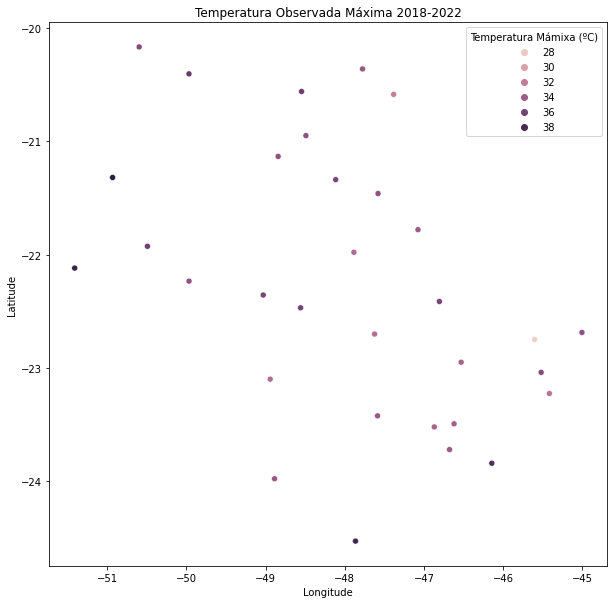

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data = df_group, x='val_longitude', y = 'val_latitude', hue='val_medicao', ax=ax)
ax.set_title('Temperatura Observada Máxima 2018-2022')
ax.legend(title='Temperatura Mámixa (ºC)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

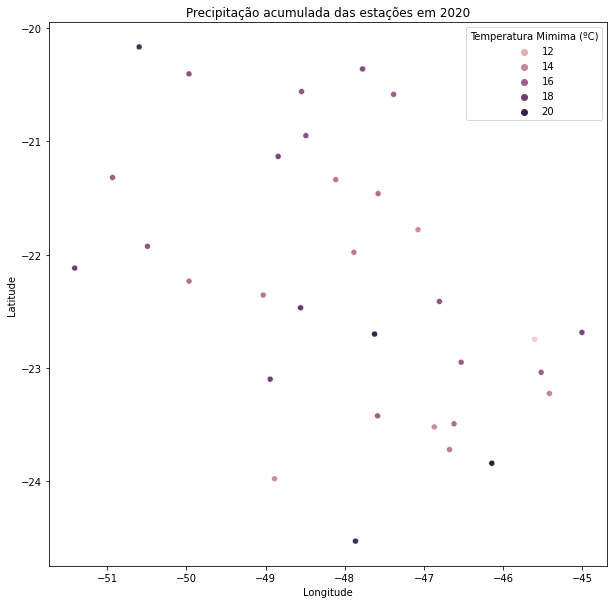

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data = df_group_temp_min, x='val_longitude', y = 'val_latitude', hue='val_medicao', ax=ax)
ax.set_title('Precipitação acumulada das estações em 2020')
ax.legend(title='Temperatura Mimima (ºC)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

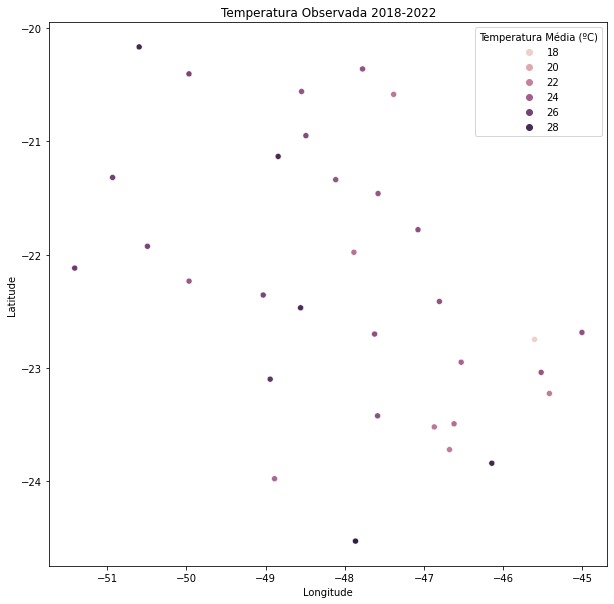

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data = df_group_temp_mean, x='val_longitude', y = 'val_latitude', hue='val_medicao', ax=ax)
ax.set_title('Temperatura Observada 2018-2022')
ax.legend(title='Temperatura Média (ºC)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Modelo

# Decidimos usar o algoritmo KNN

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# K NEAREST NEIGHBORS MODEL - Modelo dos K Vizinhos mais próximos
## Optamos por este modelo para explorar a relação espacial entre carga e temperatura

In [ ]:
df_dados =   (inmet[(inmet['din_medicao'] >= '2021-12-21') & (inmet['din_medicao'] <='2022-03-20')].groupby('din_medicao') \
    .agg({ 'val_latitude': 'min' , 'val_longitude':'min', 'val_medicao':'max'})\
    .reset_index())
df_dados.head()

,din_medicao,val_latitude,val_longitude,val_medicao
0,2021-12-21 00:00:00,-24.962778,-51.552223,26.1
1,2021-12-21 01:00:00,-24.962778,-51.552223,25.4
2,2021-12-21 02:00:00,-24.962778,-51.552223,25.3
3,2021-12-21 03:00:00,-24.962778,-51.552223,24.8
4,2021-12-21 04:00:00,-24.962778,-51.552223,24.5


In [ ]:
df_dados['din_medicao'] = inmet['din_medicao']
df_dados['nom_longo']= inmet['nom_longo']
df_dados['val_latitude'] = inmet['val_latitude']
df_dados['val_longitude'] = inmet['val_longitude']
df_dados['val_medicao'] = inmet['val_medicao'].fillna(df_dados.mean()).dropna(how='any')
df_dados = df_dados.sort_values('din_medicao')
df_dados['id_estacaometeo'] = inmet['id_estacaometeo']
df_dados

In [ ]:
df_dados.info()
df_dados.fillna(0)

In [ ]:
%%time
def get_predictions(n_neighbors, df, day):
    df_full = inmet[(inmet['din_medicao'] == day) & (inmet['nom_longo'])]
    df_full = df_full.fillna(df_full.mean())
    df_basin = inmet[(inmet['din_medicao'] == day) & (inmet['nom_longo'])]
    df_basin = df_basin.fillna(df_basin.mean())
    sc = StandardScaler()
    predictions = []
    predict_test = []
    y_test_eval = []
    for j in df_basin['nom_longo']:

        X = df_full[df_full['nom_longo'] != j][['val_longitude','val_latitude']]
        y = df_full[df_full['nom_longo'] != j]['val_medicao']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
        knn.fit(X_train, y_train)
        y_test_eval.append(y_test)
        predict_test.append(knn.predict(X_test))
        
        predictions.append(knn.predict(sc.transform(df_basin[df_basin['nom_longo'] == j][['val_longitude','val_latitude']]))[0])

    df_basin['predictions'] = predictions

    try:
        test_score = np.sqrt(mean_squared_error(y_test_eval, predict_test))
    except:
        test_score = 'Sem informação'

    return df_basin, test_score


days = pd.date_range(start='2021-01-01 00:00:00', end='2021-01-02 00:00:00', freq = 'H').strftime('%Y-%m-%d %H:%M:%S').to_list()
for i, day in enumerate(days):
    if i == 0:
        df_test, test_score = get_predictions(5, inmet, day)
        print(f'Dia {day} - Teste-RMSE: {test_score}')

    else:
        df_aux, test_score = get_predictions(5, inmet, day)
        df_test = pd.concat([df_test, df_aux])

        print(f'Dia {day} - Teste-RMSE: {test_score}')

df_test['error'] = df_test['val_medicao'] - df_test['predictions']
PBIAS = df_test['error'].sum() / df_test['val_medicao'].sum()

print(f"RMSE-final: {np.sqrt(mean_squared_error(df_test['val_medicao'], df_test['predictions']))} | R2-final: {r2_score(df_test['val_medicao'], df_test['predictions'])} | PBIAS: {PBIAS}")

## Escolha de K

In [ ]:
%%time
def get_predictions(n_neighbors, df_prec,  day): 
    df_full = inmet[(inmet['din_medicao'] == day) & (inmet['nom_longo'])]
    df_full = df_full.fillna(df_full.mean())
    df_basin = inmet[(inmet['din_medicao'] == day) & (inmet['nom_longo'])]
    df_basin = df_basin.fillna(df_basin.mean())
    sc = StandardScaler()
    predictions = []
    predict_test = []
    y_test_eval = []
    for j in df_basin['nom_longo']:

        X = df_full[df_full['nom_longo'] != j][['val_longitude','val_latitude']]
        y = df_full[df_full['nom_longo'] != j]['val_medicao']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
        knn.fit(X_train, y_train)
        y_test_eval.append(y_test)
        predict_test.append(knn.predict(X_test))
        
        predictions.append(knn.predict(sc.transform(df_basin[df_basin['nom_longo'] == j][['val_longitude','val_latitude']]))[0])

    df_basin['predictions'] = predictions

    try:
        test_score = np.sqrt(mean_squared_error(y_test_eval, predict_test))
    except:
        test_score = 'Sem informação'

    return df_basin, test_score

for k in range(2, 3):
    # 
    days = pd.date_range(start='2021-01-01 00:00:00', end='2021-01-02 00:00:00', freq = 'H').strftime('%Y-%m-%d %H:%M:%S').to_list()
    for i, day in enumerate(days):
        if i == 0:
            df_test, test_score = get_predictions(k, inmet,  day)

        else:
            df_aux, test_score = get_predictions(k, inmet, day)
            df_test = pd.concat([df_test, df_aux])

    df_test['error'] = df_test['val_medicao'] - df_test['predictions']
    PBIAS = df_test['error'].sum() / df_test['val_medicao'].sum()

    print(f"K = {k} - RMSE-final: {np.sqrt(mean_squared_error(df_test['val_medicao'], df_test['predictions']))} | R2-final: {r2_score(df_test['val_medicao'], df_test['predictions'])} | PBIAS: {PBIAS}")

### Após utilizar o modelo KNN para gerar os dados de temperatura, utilizaremos um modelo de Rede Neural Recorrente para prever os dados de carga de acordo com os dados de temperatura obtidos geoespacialmente

# RNN

In [ ]:
def municipio(distribuidora):
  mun_dist = []
  dist['Distribuidora'].count()
  #for i in range(1, len(cidade)):
  mun_dist.append(dist[dist['Distribuidora'] == distribuidora]['Município'].values)
  return mun_dist

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
temp_mean_df = inmet.groupby(['din_medicao']).agg({"val_medicao":'mean'}).reset_index()

In [ ]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
import keras

In [ ]:
class Model_builder():

    def __init__(self, input_shape):

        self.input_shape = input_shape

    def get_model(self, hp):

        # defining a set of hyperparametrs for tuning
        n_dense_layers=hp.Int(name = 'dense_layers', min_value = 2, max_value = 16, step = 2)

        lstm_units1 = hp.Int(name = 'lstm_units1', min_value = 16, max_value = 128, step = 2)
        lstm_units2 = hp.Int(name = 'lstm_units2', min_value = 16, max_value = 128, step = 2)
        lstm_units3 = hp.Int(name = 'lstm_units3', min_value = 16, max_value = 128, step = 2)
        lstm_units4 = hp.Int(name = 'lstm_units4', min_value = 16, max_value = 128, step = 2)

        dropout1 = hp.Float(name = 'dropout1', min_value=0, max_value=.3, step=0.02)
        dropout2 = hp.Float(name = 'dropout2', min_value=0, max_value=.3, step=0.02)
        dropout3 = hp.Float(name = 'dropout3', min_value=0, max_value=.3, step=0.02)
        dropout4 = hp.Float(name = 'dropout4', min_value=0, max_value=.3, step=0.02)
        
        loss= hp.Choice(name='loss', values=['mae', 'mse', 'mape'])

        regressor = Sequential()
        regressor.add(CuDNNLSTM(units=lstm_units1, return_sequences = True, input_shape = self.input_shape))
        regressor.add(Dropout(dropout1))
        regressor.add(CuDNNLSTM(units=lstm_units2, return_sequences = True,))
        regressor.add(Dropout(dropout2))
        regressor.add(CuDNNLSTM(units=lstm_units3, return_sequences = True))
        regressor.add(Dropout(dropout3))
        regressor.add(CuDNNLSTM(units=lstm_units4))
        regressor.add(Dropout(dropout4))
        regressor.add(Dense(units=1))
        regressor.compile(optimizer = 'adam', loss = loss, metrics=['mse'])

        return regressor


In [ ]:
for index, distribuidora in enumerate(['CPFL PAULISTA', 'ELEKTRO']):

    #X = inmet[inmet['nom_longo'] in municipio()[0]]['val_medicao'].mean().values
    tempCity_mean_df = inmet[inmet['nom_longo'].isin(municipio(distribuidora)[0])].groupby(['din_medicao']).agg({"val_medicao":'mean'}).reset_index()
    X = tempCity_mean_df.drop(columns=['din_medicao']).interpolate(limit_direction='both')
    #X = X[0:30]
    y = df_carga[df_carga['Distribuidora'] == distribuidora][['val_itemserieoriginal']].interpolate(limit_direction='both').values
    #y =y[0:30]
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:(y.shape[0])], y, random_state=42, test_size=0.2)

    scX = MinMaxScaler()
    scY = MinMaxScaler()
    X_train = scX.fit_transform(X_train)  
    X_test = scX.transform(X_test)
    X_train=X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test=X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    y_train = scY.fit_transform(y_train)  
    y_test = scY.transform(y_test)

    hp_model = Model_builder(input_shape=(X_train.shape[1], X_train.shape[2])).get_model

    bayesian_tuner=kt.BayesianOptimization(
                    hp_model,
                    objective="val_mse",
                    max_trials=10,
                    executions_per_trial=1,
                    overwrite=True,
                    beta=3.6,
                    project_name="Prediction {}".format(distribuidora)
                )

    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_mse',
            patience=8,
            restore_best_weights=True
        ),
        keras.callbacks.TerminateOnNaN()
    ]

    bayesian_tuner.search(x=X_train, y=y_train, callbacks=callbacks, validation_data=(X_test, y_test), verbose=2, batch_size=64, epochs=100)



Trial 10 Complete [00h 00m 51s]
val_mse: 0.026559311896562576

Best val_mse So Far: 0.026518765836954117
Total elapsed time: 00h 07m 18s
INFO:tensorflow:Oracle triggered exit


In [ ]:
for index, distribuidora in enumerate(['CPFL PAULISTA','ELEKTRO']):

    tempCity_mean_df = inmet[inmet['nom_longo'].isin(municipio(distribuidora)[0])].groupby(['din_medicao']).agg({"val_medicao":'mean'}).reset_index()
    X = tempCity_mean_df.drop(columns=['din_medicao']).interpolate(limit_direction='both')
    #X = X[0:30]
    y = df_carga[df_carga['Distribuidora'] == distribuidora][['val_itemserieoriginal']].interpolate(limit_direction='both').values

    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:(y.shape[0])], y, random_state=42, test_size=0.2)

    x_index = tempCity_mean_df['din_medicao'].iloc[:(y.shape[0])].iloc[-X_test.shape[0]:]

    scX = MinMaxScaler()
    scY = MinMaxScaler()
    X_train = scX.fit_transform(X_train)  
    X_test = scX.transform(X_test)
    X_train=X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test=X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    y_train = scY.fit_transform(y_train)  
    y_test = scY.transform(y_test)

    hp_model = Model_builder(input_shape=(X_train.shape[1], X_train.shape[2])).get_model

    bayesian_tuner=kt.BayesianOptimization(hp_model,project_name="Prediction {}".format(distribuidora))

    best_model = bayesian_tuner.get_best_models()[0]
    prediction = best_model.predict(X_test)

    prediction = scY.inverse_transform(prediction)
    y_test = scY.inverse_transform(y_test)

    fig = px.line(pd.DataFrame(np.array([prediction, y_test]).reshape(np.array([prediction, y_test]).shape[0], np.array([prediction, y_test]).shape[1]).transpose(),
                               columns=['Prediction {}'.format(distribuidora), distribuidora]),
        y=['Prediction {}'.format(distribuidora), distribuidora],
        x = x_index
        )
        
    fig.update_layout(
        title=distribuidora,
        width=1800,
        height=1000)
    fig.update_xaxes(title="Time")
    #rangeslider_visible=True
    fig.update_yaxes(title="Energy")
    fig.show()




